<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. Fatemi Zadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: kooshan fattah

**Student ID**: 401102191


# 📈 **Linear Regression**
#### **What is linear regression used for?**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

# **Making Predictions with Linear Regression**

Given the representation is a linear equation, making predictions is as simple as solving the equation for a specific set of inputs.

Let’s make this concrete with an example. Imagine we are predicting y from  x. Our linear regression model representation for this problem would be:

**y = B0 + B1 * x1**


Where B0 is the bias coefficient and B1 is the coefficient for x column. We use a learning technique to find a good set of coefficient values. Once found, we can plug in different height values to predict y.

you are only allowed to use these libraries:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

Load a real estate dataset, display its first few rows, examine its shape, check its data types, compute the correlations between its features, and visualize these correlations using a heatmap?

Dataset Overview:
--------------------
First 5 rows of the dataset:
   No  X1 transaction date  X2 house age  X3 distance to the nearest MRT station  X4 number of convenience stores  X5 latitude  X6 longitude  Y house price of unit area
0   1             2012.917          32.0                                84.87882                               10     24.98298     121.54024                        37.9
1   2             2012.917          19.5                               306.59470                                9     24.98034     121.53951                        42.2
2   3             2013.583          13.3                               561.98450                                5     24.98746     121.54391                        47.3
3   4             2013.500          13.3                               561.98450                                5     24.98746     121.54391                        54.8
4   5             2012.833           5.0                               390.56840       

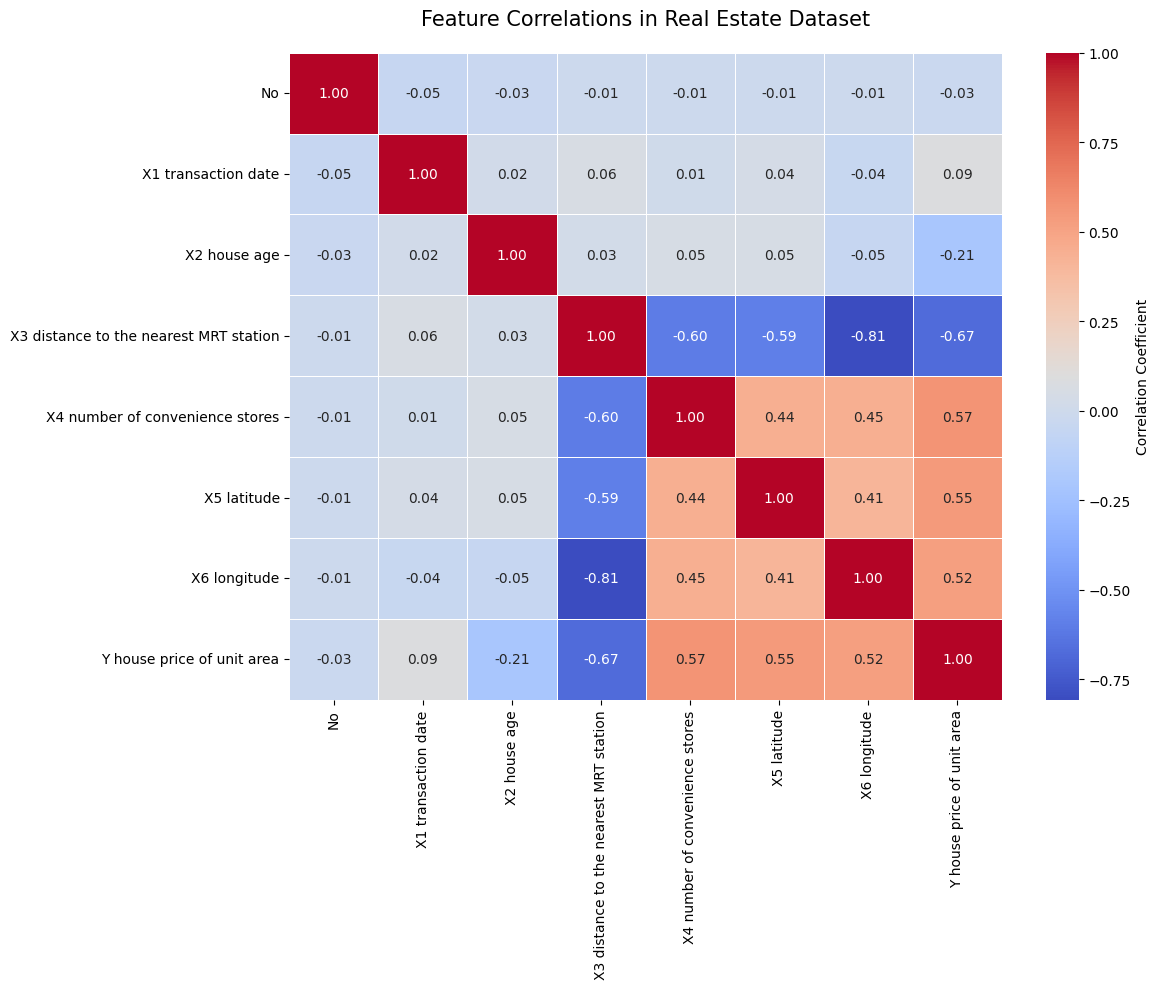

In [5]:
#code here#code here
real_estate_data = pd.read_csv('/kaggle/input/realstate/Real estate.csv')

print("Dataset Overview:")
print("-" * 20)

print("First 5 rows of the dataset:")
print(real_estate_data.head().to_string())

print(f"\nDataset Dimensions: {real_estate_data.shape[0]} rows, {real_estate_data.shape[1]} columns")

print("\nColumn Data Types:")
print(real_estate_data.dtypes.to_string())

plt.figure(figsize=(12, 10))
correlation_matrix = real_estate_data.corr()

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Feature Correlations in Real Estate Dataset", fontsize=15, pad=20)
plt.tight_layout()
plt.show()

Exploratory Data Analysis (EDA)

Create pairwise scatter plots for all the features in a real estate dataset, and briefly explain your undrestanding of this plot.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

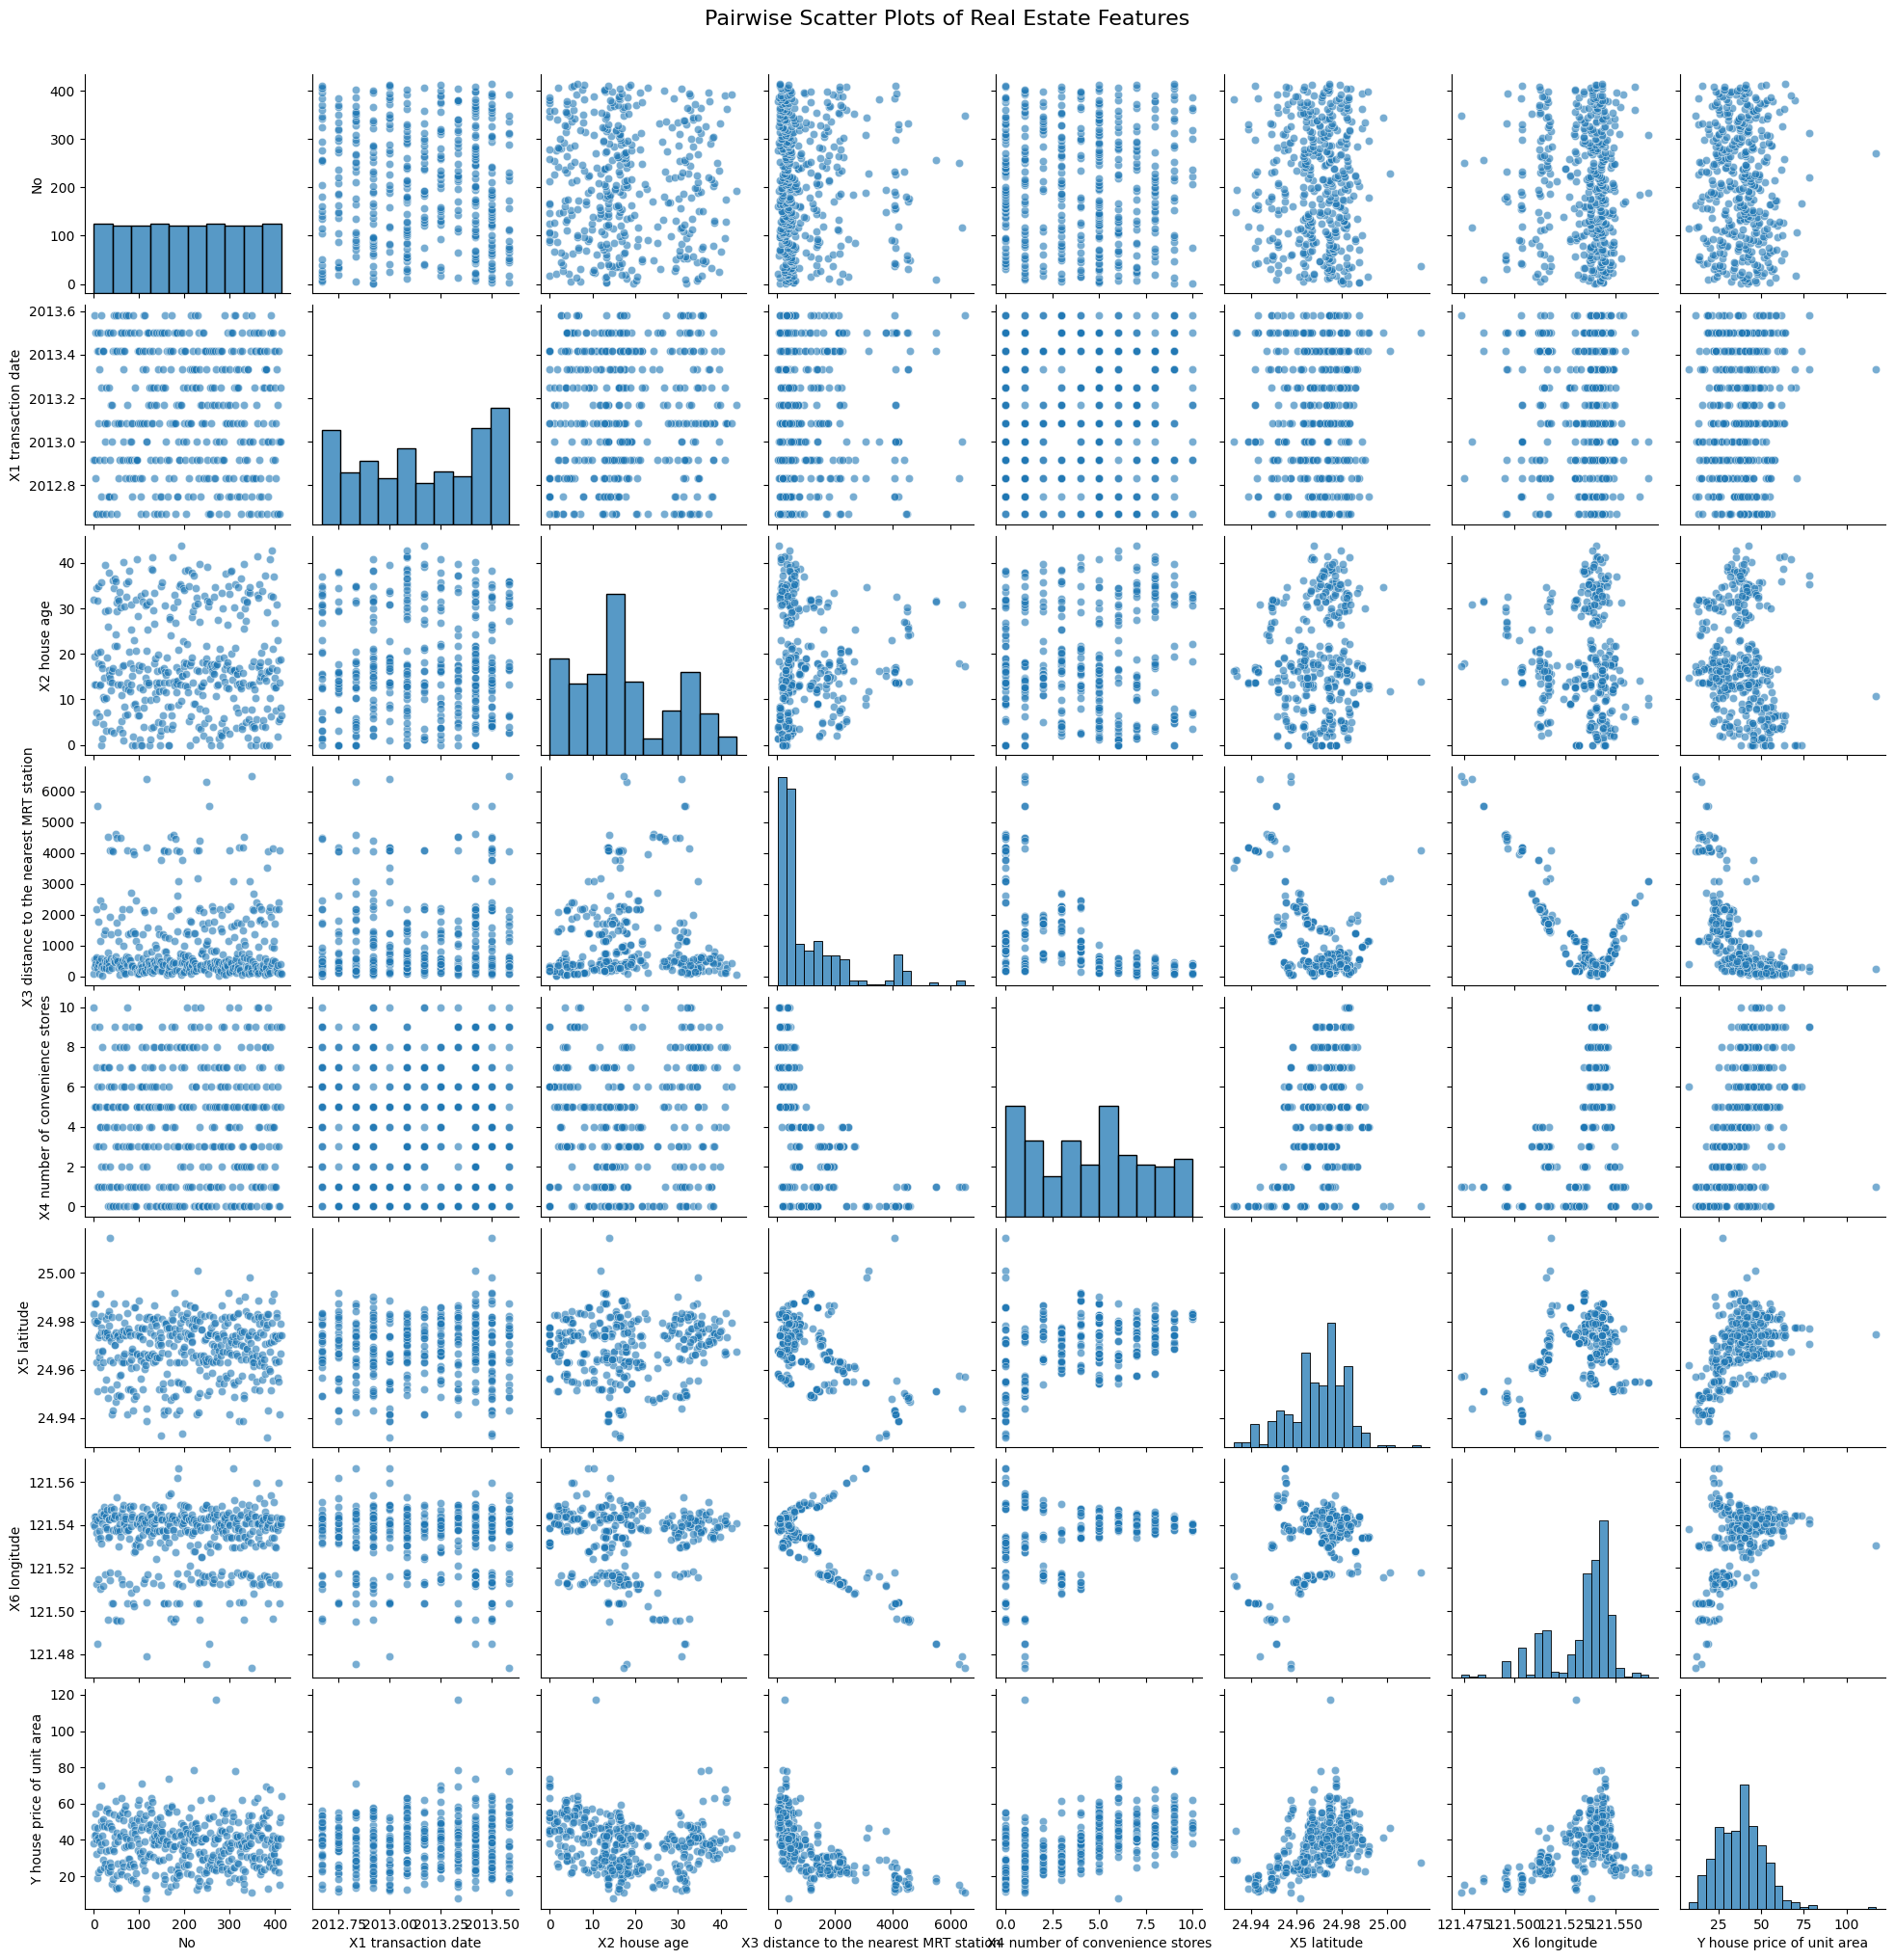

In [6]:
#code here
sns.pairplot(
    real_estate_data, 
    diag_kind='hist',  # Histogram on diagonal
    plot_kws={'alpha': 0.6},  # Transparency for scatter points
    height=2.5  # Adjust subplot size
)
plt.suptitle("Pairwise Scatter Plots of Real Estate Features", fontsize=16, y=1.02)
plt.show()

Amswer:
The pairplot provides a comprehensive visual exploration of our dataset's intricate relationships, revealing insights through two distinct plot types:

**Diagonal Plots (Distribution Landscapes):**
- Histograms that unveil the unique "personality" of each feature
- Showcase how individual variables are spread across their range
- Highlight variations in data distribution:
  * Symmetric or skewed distributions
  * Presence of multiple peaks or modes
  * Range and concentration of values
- Identify potential data anomalies or interesting characteristics in each feature

**Off-Diagonal Scatter Plots (Relationship Mappings):**

1. **Linear Relationships:**
   - Straight-line trends revealing strong correlations
   - Positive slope: features increase together
   - Negative slope: as one feature rises, another declines
   - Steepness indicates correlation strength

2. **Non-Linear Interactions:**
   - Curved or complex patterns suggesting sophisticated relationships
   - May indicate underlying market dynamics not captured by simple linear models

3. **Clustering Dynamics:**
   - Point groupings that might represent:
     * Market segments
     * Property type clusters
     * Geographical variations
   - Potential for targeted analysis or segmentation strategies

4. **Correlation Insights:**
   - Random point spreads indicating weak or no direct relationship
   - Tightly clustered points suggesting strong interdependencies
   - Sparse or dispersed clusters revealing complex market behaviors

5. **Outlier Detection:**
   - Points significantly distant from main clusters
   - Potential indicators of:
     * Unique property characteristics
     * Data collection errors
     * Exceptional market instances
   - Critical for understanding market extremes and data quality


Training a Linear Regression Model

How would you extract the features and the target variable from a real estate dataset, excluding the house price?


Answer:
**Features (X): The Predictive Mosaic**
- Comprehensive set of input variables that collectively tell the property's story
- Each feature acts as a unique lens capturing different aspects of real estate valuation
- Includes multidimensional information such as:
  * Geographical attributes
  * Structural characteristics
  * Proximity metrics
  * Environmental context
- Represents the collective intelligence driving price predictions
- Raw data transformed into meaningful predictive signals
**Target Variable (y): The Valuation Destination**
- Singular column representing the ultimate prediction goal: house price
- The dependent variable all our analysis converges towards
- Encapsulates the complex market dynamics of property valuation
- Serves as the benchmark against which our predictive models will be evaluated
**Strategic Separation Rationale:**
- Enables machine learning algorithms to understand input-output relationships
- Facilitates systematic model training and validation
- Transforms raw data into a structured predictive framework
- Allows exploration of how multiple features collectively influence property pricing

If X represents all the features in the dataset except for the house price and y represents the number of convenience stores from the dataset ,display their shapes

In [7]:
#code here
X = real_estate_data.drop(columns=['Y house price of unit area'])
y = real_estate_data['Y house price of unit area']

print("Feature Matrix (X) Dimensions:", X.shape)
print("Target Vector (y) Dimensions:", y.shape)

# Optional: Display feature names and basic statistics
print("\nFeature Columns:")
print(X.columns.tolist())

print("\nTarget Variable Summary:")
print(y.describe())

Feature Matrix (X) Dimensions: (414, 7)
Target Vector (y) Dimensions: (414,)

Feature Columns:
['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

Target Variable Summary:
count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64


Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #code here 

In [9]:
X_train.shape

(331, 7)

In [10]:
X_test.shape

(83, 7)

Now, train a linear regression model using the training data X_train and y_train.

In [11]:
#code here
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Optional: Print model coefficients and intercept
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")

Model Coefficients:
No: -0.0056
X1 transaction date: 5.4074
X2 house age: -0.2678
X3 distance to the nearest MRT station: -0.0048
X4 number of convenience stores: 1.0811
X5 latitude: 226.0488
X6 longitude: -30.1255

Intercept: -12824.2566


Model Evaluation

Show the coefficients of the trained linear regression model and present them in a DataFrame with the corresponding feature names

Linear Regression Model Coefficients:
                               Feature   Coefficient  Absolute_Coefficient
                           X5 latitude    226.048799            226.048799
                          X6 longitude    -30.125491             30.125491
                   X1 transaction date      5.407435              5.407435
       X4 number of convenience stores      1.081144              1.081144
                          X2 house age     -0.267828              0.267828
                                    No     -0.005617              0.005617
X3 distance to the nearest MRT station     -0.004815              0.004815
                             Intercept -12824.256570          12824.256570


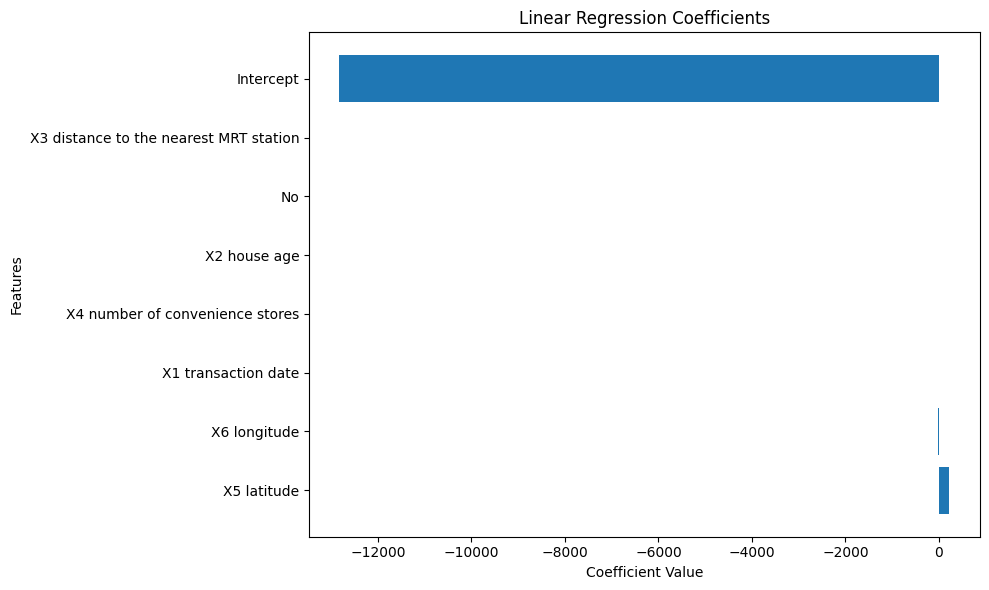

In [12]:
#code here
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coefficients_df['Absolute_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values('Absolute_Coefficient', ascending=False)
intercept_row = pd.DataFrame({
    'Feature': ['Intercept'],
    'Coefficient': [model.intercept_],
    'Absolute_Coefficient': [abs(model.intercept_)]
})
coefficients_df = pd.concat([coefficients_df, intercept_row], ignore_index=True)
print("Linear Regression Model Coefficients:")
print(coefficients_df.to_string(index=False))
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

How would you use our trained linear regression model to make predictions on the test data X_test?


1. **Prediction Generation:** 
   - Uses `model.predict()` to generate predictions for X_test

2. **Performance Metrics:**
   - Mean Squared Error (MSE): Average squared difference between predicted and actual values
   - Root Mean Squared Error (RMSE): Square root of MSE, in the same unit as the target variable
   - Mean Absolute Error (MAE): Average absolute difference between predictions and actual values
   - R-squared (R²): Proportion of variance in the target variable explained by the model

3. **Results DataFrame:**
   - Shows actual values, predicted values, and absolute errors
   - Helps in detailed error analysis

4. **Visualization:**
   - Scatter plot of actual vs. predicted values
   - Red dashed line represents perfect predictions
   - Helps visually assess prediction accuracy

In [19]:
y_pred = model.predict(X_test)
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error, 
    r2_score
)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred,
    'Absolute Error': abs(y_test - y_pred)
})
print("Model Prediction Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.tight_layout()
plt.show()

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for a linear regression model's predictions, and find the mean value of the 'X4 number of convenience stores' feature from the dataset and print them.

In [25]:
#code here
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Find mean of 'X4 number of convenience stores' feature
convenience_stores_mean = X['X4 number of convenience stores'].mean()

# Print results with formatted output
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE):       {mae:.4f}")
print(f"Mean Squared Error (MSE):        {mse:.4f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
print(f"\nMean Number of Convenience Stores: {convenience_stores_mean:.2f}")

# Optional: Percentage of error relative to mean house price
mean_house_price = y_test.mean()
mae_percentage = (mae / mean_house_price) * 100
rmse_percentage = (rmse / mean_house_price) * 100

print("\nError as Percentage of Mean House Price:")
print(f"MAE Percentage: {mae_percentage:.2f}%")
print(f"RMSE Percentage: {rmse_percentage:.2f}%")

Model Performance Metrics:
Mean Absolute Error (MAE):       5.4180
Mean Squared Error (MSE):        54.6020
Root Mean Squared Error (RMSE):  7.3893

Mean Number of Convenience Stores: 4.09

Error as Percentage of Mean House Price:
MAE Percentage: 14.91%
RMSE Percentage: 20.33%


## Residual Histogram

Often for Linear Regression it is a good idea to separately evaluate residuals $$(y-\hat{y})$$ and not just calculate performance metrics (e.g. RMSE).

Let's explore why this is important...

The residual erors should be random and close to a normal distribution.

Compute the residuals from the test predictions and visualize their distribution using both a kernel density estimation (KDE) plot and a seaborn histogram with a KDE overlay.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


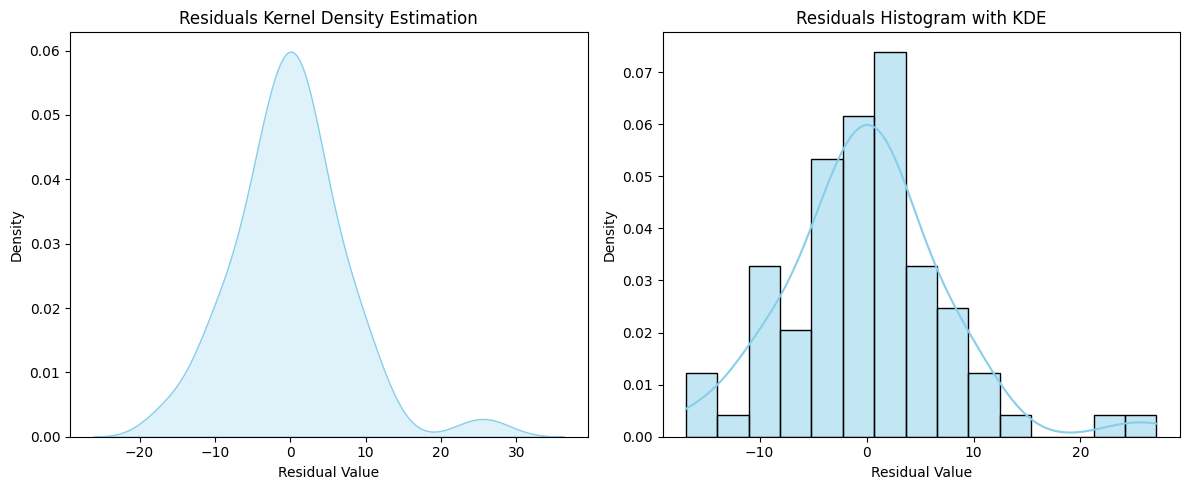

Residuals Statistical Summary:
Mean of Residuals:      -0.0006
Standard Deviation:     7.3893
Minimum Residual:       -16.8816
Maximum Residual:       27.1048


In [15]:
residuals= y_test - y_pred
#code here
plt.figure(figsize=(12, 5))

# Subplot 1: Kernel Density Estimation (KDE) Plot
plt.subplot(1, 2, 1)
sns.kdeplot(residuals, fill=True, color='skyblue')
plt.title('Residuals Kernel Density Estimation')
plt.xlabel('Residual Value')
plt.ylabel('Density')

# Subplot 2: Histogram with KDE Overlay
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='skyblue', stat='density')
plt.title('Residuals Histogram with KDE')
plt.xlabel('Residual Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Additional statistical summary of residuals
print("Residuals Statistical Summary:")
print(f"Mean of Residuals:      {np.mean(residuals):.4f}")
print(f"Standard Deviation:     {np.std(residuals):.4f}")
print(f"Minimum Residual:       {np.min(residuals):.4f}")
print(f"Maximum Residual:       {np.max(residuals):.4f}")

* **Residual plot shows residual error VS. true y value.**

Create a scatter plot to visualize the relationship between the true values (y_test) and the residuals, and add a horizontal line at y=0 to indicate where the residuals should ideally fall

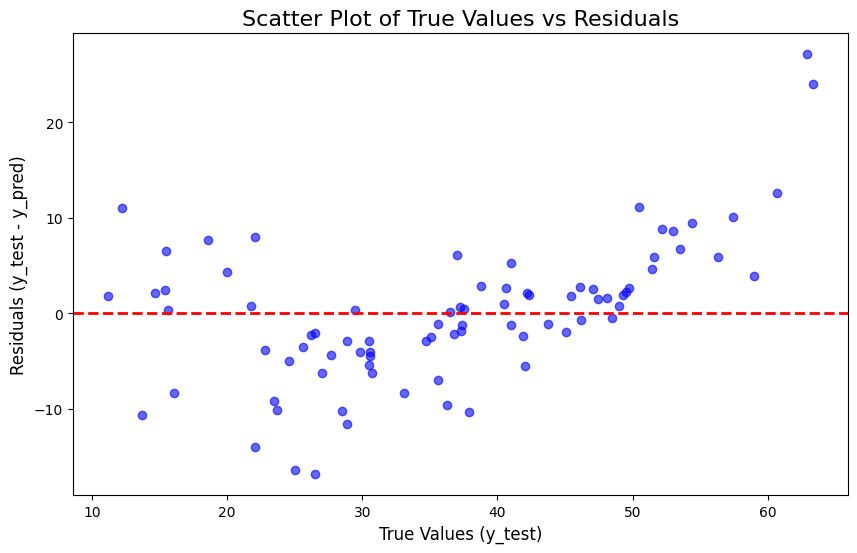

In [18]:
#code here
plt.figure(figsize=(10, 6))

plt.scatter(y_test, residuals, color='blue', alpha=0.6)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.title("Scatter Plot of True Values vs Residuals", fontsize=16)
plt.xlabel("True Values (y_test)", fontsize=12)
plt.ylabel("Residuals (y_test - y_pred)", fontsize=12)

plt.show()

 **Residualplot showing a clear pattern, indicating Linear Regression no valid!**